## Load Required Libraries
 - ```pip install pandas```<br>
 - ```pip install tensorflow>=2```<br>
 
# Disable Tensorflow Warning

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn # Not Recommended

# Import Function

In [2]:
from py_topping.data_preparation.lazy_ml import lazy_dnn

In [ ]:
lazy_dnn(train_in 
        , target_in
        , num_col_in = []
        , cat_col_in = [] 
        , node_in = [16,4]
        , val_in = None 
        , train_batch = 10 
        , val_batch = 10 
        , epochs = 10 
        , normalize = True
        , embedded_size = 16 
        , drop_out_ratio = 0.1
        , patience_in = 10
        , amplify_in = 1
        , optimize_in = 'adam'
        , loss_in = 'mse' 
        , debug = False) 

### List of Parameter
 - **train_in** : Training Dataset (Pandas DataFrame)
 - **target_in** : Name of Target Prediction (String)
 - **num_col_in** : List of Columns' name for numeric feature (List)
 - **cat_col_in**  : List of Columns' name for categorical feature (List)
 - **node_in** : List of Neural Network Node and Layer (List)
 - **val_in** : Validate Dataset (Pandas DataFrame)
 - **train_batch** : Number observations to training per batch (Integer)
 - **val_batch** : Number observations to validate per batch (Integer)
 - **epochs** : Number of Iteration during the training (Integer)
 - **normalize** : To normalize Numeric or not (Boolean)
 - **embedded_size** : Size of Embedded Layer for Categorical Columns (Integer)
 - **drop_out_ratio** : Percentage of Node that will Drop for Categorical's Embedded Layer (Float)
 - **patience_in** : Number of Iteration that model allow if the loss not improve (Integer)
 - **amplify_in** : Amplify during the Last DNN Layer (Float)
 - **optimize_in** : TF's Optimizer that will use during the Training (String)
 - **loss_in** : TF's Loss that will use during the Training (String)
 - **debug** : To show Model's Summary Structure & Learning Curve or not (Boolean)

**Return** : Tensorflow's Sequential Model

# Sample DataFrame

In [3]:
import pandas as pd
import numpy as np

train = pd.DataFrame({'num1' : range(0,100), 'num2' : np.random.rand(100), 'cat1' : np.random.randint(3 , size=100)})
train['num3'] = train['num1']*np.where(train['cat1'] == 1, 20, train['cat1'] + 2)
val = pd.DataFrame({'num1' : range(0,100), 'num2' : np.random.rand(100), 'cat1' : np.random.randint(3 , size=100)})
val['num3'] = val['num1']*np.where(val['cat1'] == 1, 20, val['cat1'] + 2)
test = pd.DataFrame({'num1' : range(0,20), 'num2' : np.random.rand(20), 'cat1' : np.random.randint(3 , size=20)})
test['num3'] = test['num1']*np.where(test['cat1'] == 1, 20, test['cat1'] + 2)
train.head(5)

,num1,num2,cat1,num3
0,0,0.552626,1,0
1,1,0.754082,1,20
2,2,0.946963,0,4
3,3,0.781095,0,6
4,4,0.500676,0,8


# Training Phase


### Basic Train With 1 numeric Feature

In [4]:
model = lazy_dnn(train_in = train
                , target_in = 'num3'
                , num_col_in = ['num1']) 

Epoch 1/10
10/10 [==============================] - 0s 883us/step - loss: 348511.1932
Epoch 2/10
10/10 [==============================] - 0s 997us/step - loss: 275056.5625
Epoch 3/10
10/10 [==============================] - 0s 997us/step - loss: 309452.1996
Epoch 4/10
10/10 [==============================] - 0s 993us/step - loss: 461878.6335
Epoch 5/10
10/10 [==============================] - 0s 997us/step - loss: 349636.0114
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 426512.2415
Epoch 7/10
10/10 [==============================] - 0s 997us/step - loss: 405689.5739
Epoch 8/10
10/10 [==============================] - 0s 891us/step - loss: 331096.6847
Epoch 9/10
10/10 [==============================] - 0s 886us/step - loss: 340176.3438
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 250046.2869


### Basic Train With 1 numeric Feature and 1 categorical Feature

In [5]:
model = lazy_dnn(train_in = train
                , target_in = 'num3'
                , num_col_in = ['num1']
                , cat_col_in = ['cat1']) 

Epoch 1/10
10/10 [==============================] - 0s 887us/step - loss: 332176.1420
Epoch 2/10
10/10 [==============================] - 0s 994us/step - loss: 408911.5341
Epoch 3/10
10/10 [==============================] - 0s 997us/step - loss: 328845.8906
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 329871.1250
Epoch 5/10
10/10 [==============================] - 0s 997us/step - loss: 271528.7195
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 333370.3139
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 258454.5190
Epoch 8/10
10/10 [==============================] - 0s 997us/step - loss: 322078.1364
Epoch 9/10
10/10 [==============================] - 0s 997us/step - loss: 393956.2727
Epoch 10/10
10/10 [==============================] - 0s 997us/step - loss: 462403.3011


### Basic Train With 2 numeric Feature and 1 categorical Feature

In [6]:
model = lazy_dnn(train_in = train
                , target_in = 'num3'
                , num_col_in = ['num1','num2']
                , cat_col_in = ['cat1']) 

Epoch 1/10
10/10 [==============================] - 1s 997us/step - loss: 398206.0227
Epoch 2/10
10/10 [==============================] - 0s 887us/step - loss: 359372.4290
Epoch 3/10
10/10 [==============================] - 0s 997us/step - loss: 303732.9773
Epoch 4/10
10/10 [==============================] - 0s 997us/step - loss: 362671.4773
Epoch 5/10
10/10 [==============================] - 0s 887us/step - loss: 363074.1165
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 232226.3121
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 312758.4048
Epoch 8/10
10/10 [==============================] - 0s 997us/step - loss: 296446.0355
Epoch 9/10
10/10 [==============================] - 0s 890us/step - loss: 385174.9744
Epoch 10/10
10/10 [==============================] - 0s 997us/step - loss: 278695.5440


### Show Model Summary and Curve

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cat1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
cat1_embedding (Embedding)      (None, 1, 16)        64          cat1[0][0]                       
__________________________________________________________________________________________________
num1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
num2 (InputLayer)               [(None, 1)]          0                                            
____________________________________________________________________________________________

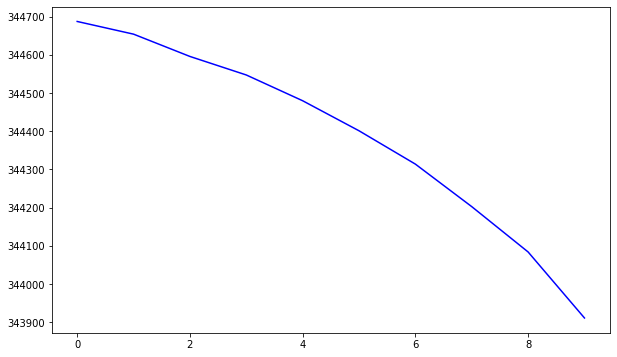

In [7]:
model = lazy_dnn(train_in = train
                , target_in = 'num3'
                , num_col_in = ['num1','num2']
                , cat_col_in = ['cat1']
                , debug = True) 

### Training With Validate Data Set

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cat1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
cat1_embedding (Embedding)      (None, 1, 16)        64          cat1[0][0]                       
__________________________________________________________________________________________________
num1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
num2 (InputLayer)               [(None, 1)]          0                                            
____________________________________________________________________________________________

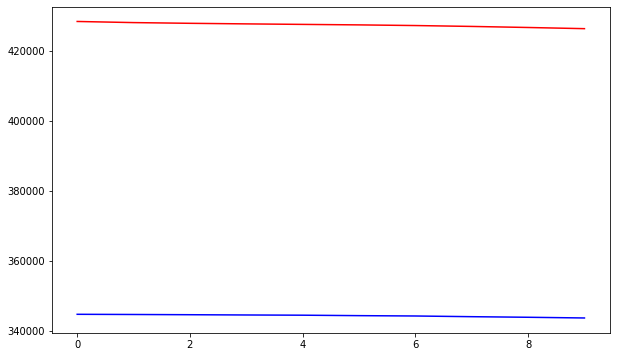

In [8]:
model = lazy_dnn(train_in = train , val_in = val
                , target_in = 'num3'
                , num_col_in = ['num1','num2']
                , cat_col_in = ['cat1']
                , debug = True) 

### Modify Neural Network and Iteration

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cat1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
cat1_embedding (Embedding)      (None, 1, 16)        64          cat1[0][0]                       
__________________________________________________________________________________________________
num1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
num2 (InputLayer)               [(None, 1)]          0                                            
____________________________________________________________________________________________

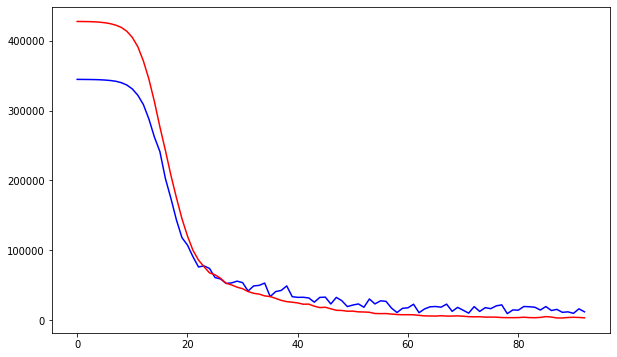

In [9]:
model = lazy_dnn(train_in = train , val_in = val
                , target_in = 'num3'
                , num_col_in = ['num1','num2']
                , cat_col_in = ['cat1']
                , node_in = [64,32,16]
                , train_batch = 10 , val_batch = 10 
                , epochs = 100
                , normalize = True , embedded_size = 16, drop_out_ratio = 0.1
                , patience_in = 5 , debug = True) 

# Prediction Phase

In [10]:
model.predict(dict(test)).flatten()

array([ 62.56242 ,  23.956434, 114.336876,  23.729815, 105.35417 ,
       122.149734,  24.27371 ,  24.19849 ,  57.918472, 217.04904 ,
        26.338394,  57.674805, 218.6401  ,  28.250418,  56.732536,
       293.6897  , 291.1914  ,  35.424614,  78.47526 ,  72.82402 ],
      dtype=float32)

<AxesSubplot:>

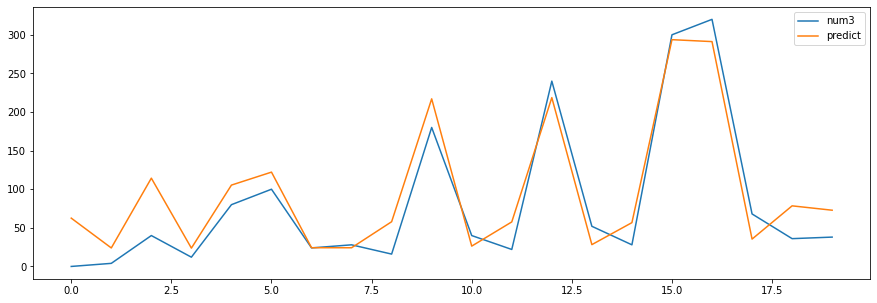

In [11]:
test['predict'] = model.predict(dict(test)).flatten()
test[['num3','predict']].plot(figsize = (15,5))